In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "D:\programs\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "D:\programs\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "D:\programs\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "D:\programs\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "D:\programs\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "D:\programs\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "D:\programs\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "D:\programs\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

AttributeError: _ARRAY_API not found

In [2]:
# Load California housing dataset
housing = fetch_california_housing(as_frame=True)
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['PRICE'] = housing.target

In [3]:
print(data.isnull().sum())
print(data.describe())
print(data.info())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mea

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='PRICE', ylabel='Count'>

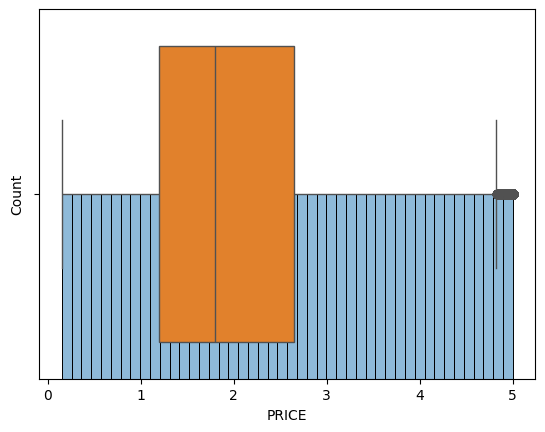

In [5]:
sns.histplot(data.PRICE, kde=True)
sns.boxplot(x=data.PRICE)

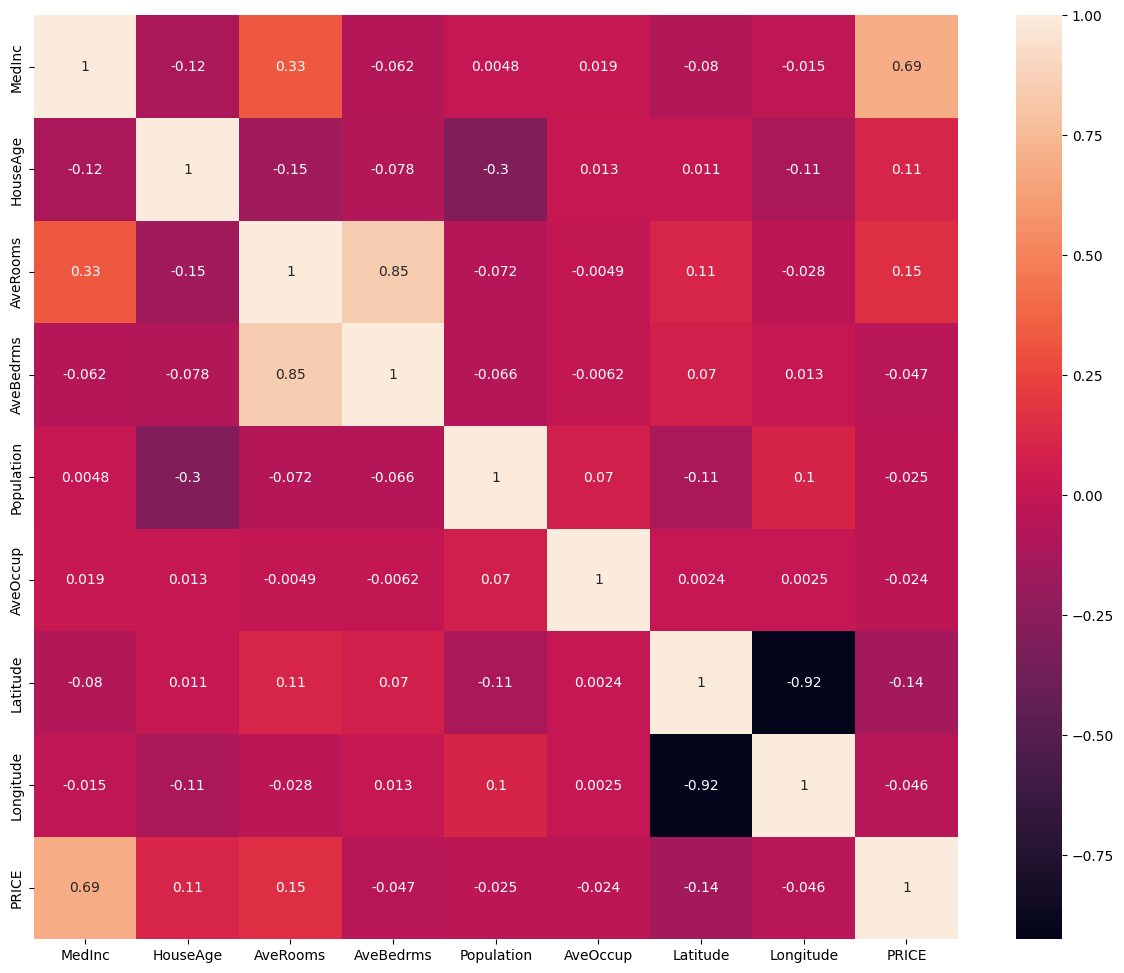

In [6]:
correlation = data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, square=True, annot=True)
plt.show()

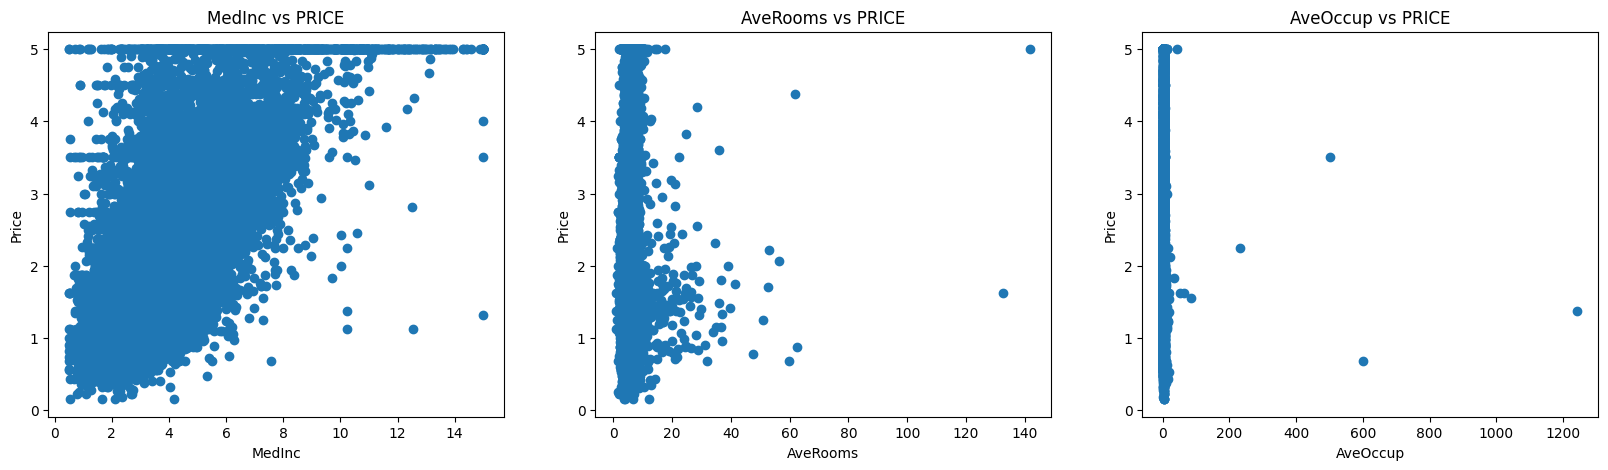

In [7]:
features = ['MedInc', 'AveRooms', 'AveOccup']
plt.figure(figsize=(20, 5))
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.scatter(data[col], data.PRICE, marker='o')
    plt.title(f"{col} vs PRICE")
    plt.xlabel(col)
    plt.ylabel("Price")
plt.show()

In [8]:
X = data.iloc[:, :-1]
y = data.PRICE

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [12]:
import numpy as np

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Linear Regression RMSE:", rmse)
print("Linear Regression R2:", r2)

Linear Regression RMSE: 0.7455813830127763
Linear Regression R2: 0.575787706032451


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ImportError: Traceback (most recent call last):
  File "C:\Users\Yash Dhumal\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\pywrap_tensorflow.py", line 70, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [ ]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Neural Network MSE:', mse_nn)
print('Neural Network MAE:', mae_nn)

In [ ]:
# Prediction
new_data = sc.transform([[8.0, 17.0, 6.0, 1.0, 0.3, 5.0, 34.0, -120.0]])
print("Predicted house price:", model.predict(new_data))